In [0]:
import pandas as pd
import numpy as np
import seaborn as sns
import datetime
import matplotlib.pyplot as plt
plt.style.use('seaborn')
import plotly.express as px

In [0]:
confirmed_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
deaths_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')
recoveries_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv')

In [0]:
keys = confirmed_df.keys()
confirmed = confirmed_df.drop(['Province/State', 'Country/Region', 'Lat', 'Long'], axis=1)
deaths = deaths_df.drop(['Province/State', 'Country/Region', 'Lat', 'Long'], axis=1)
recoveries = recoveries_df.drop(['Province/State', 'Country/Region', 'Lat', 'Long'], axis=1)

In [0]:
deaths_rates = deaths.sum()/confirmed.sum()
recoveries = recoveries.sum()/confirmed.sum()

In [0]:
world_cases = confirmed.sum()
world_deaths = deaths.sum()
days_1_22 = pd.DataFrame(np.array([i for i in range(len(confirmed.keys()))]).reshape(-1, 1))
br_cases = confirmed[confirmed_df['Country/Region'] == 'Brazil']
it_cases = confirmed[confirmed_df['Country/Region'] == 'Italy']
ch_cases = confirmed[confirmed_df['Country/Region'] == 'China']
us_cases = confirmed[confirmed_df['Country/Region'] == 'US']
sa_cases = confirmed[confirmed_df['Country/Region'] == 'South Africa']

In [0]:
future_days = 10
future = pd.DataFrame(np.array([i for i in range(len(confirmed.keys())+future_days)]).reshape(-1, 1))
adjusted_dates = pd.DataFrame(future[:-10])

In [0]:
start = '1/22/2020'
start_date = datetime.datetime.strptime(start, '%m/%d/%Y')
future_forcast_dates = []
for i in range(len(future)):
    future_forcast_dates.append((start_date + datetime.timedelta(days=i)).strftime('%m/%d/%Y'))

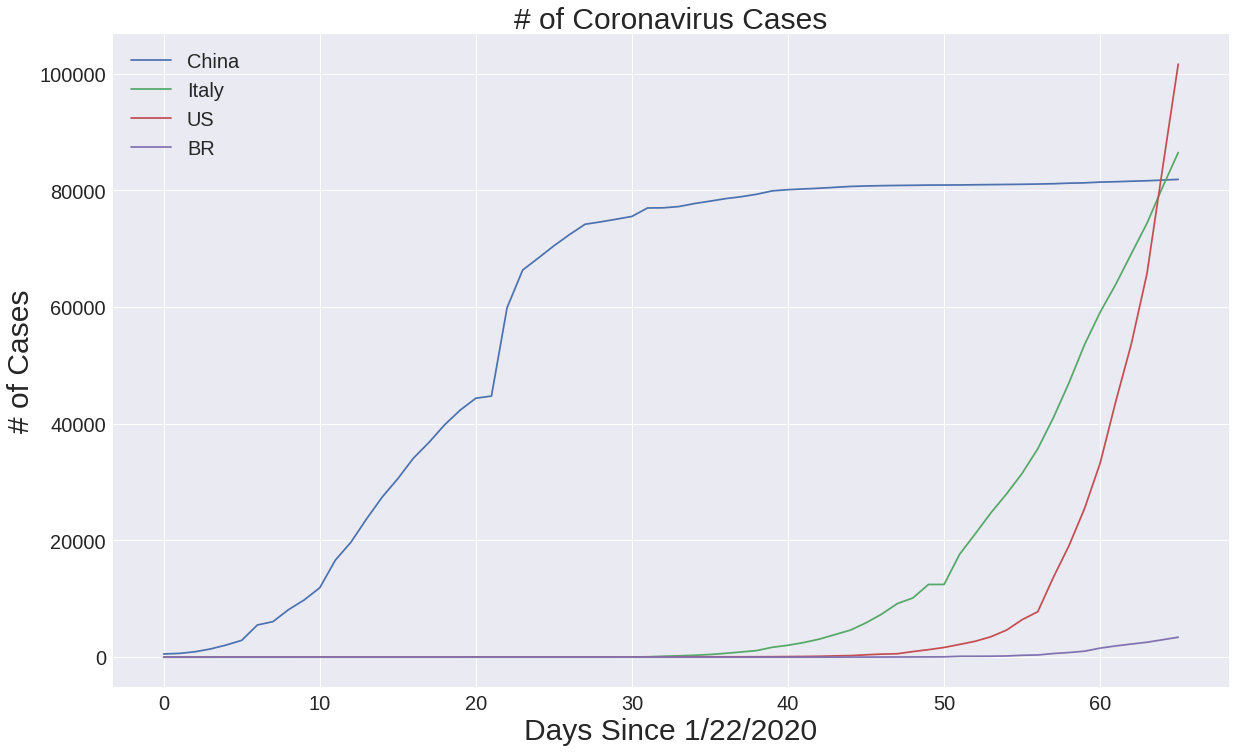

In [36]:
plt.figure(figsize=(20, 12))
plt.plot(adjusted_dates, ch_cases.sum())
plt.plot(adjusted_dates, it_cases.sum())
plt.plot(adjusted_dates, us_cases.sum())
plt.plot(adjusted_dates, br_cases.sum())
plt.title('# of Coronavirus Cases', size=30)
plt.xlabel('Days Since 1/22/2020', size=30)
plt.ylabel('# of Cases', size=30)
plt.legend(['China', 'Italy', 'US', 'BR'], prop={'size': 20})
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

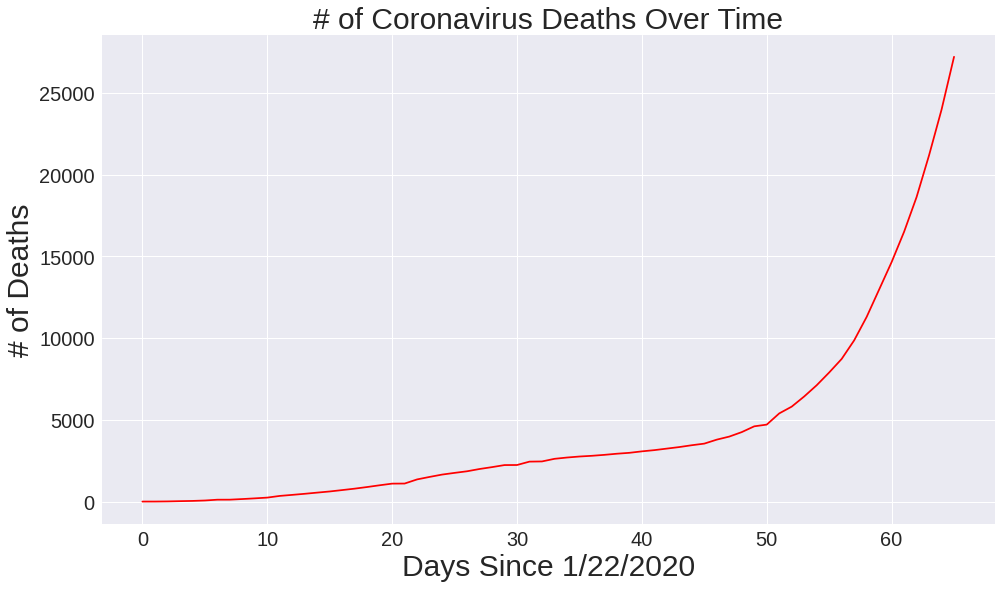

In [18]:
plt.figure(figsize=(16, 9))
plt.plot(adjusted_dates, deaths.sum(), color='red')
plt.title('# of Coronavirus Deaths Over Time', size=30)
plt.xlabel('Days Since 1/22/2020', size=30)
plt.ylabel('# of Deaths', size=30)
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

In [0]:
from sklearn.model_selection import train_test_split , RandomizedSearchCV
confirmed_X_train, confirmed_X_test, confirmed_y_train, confirmed_y_test = train_test_split(days_1_22, world_cases, test_size=0.18)

### SVR

In [0]:
from sklearn.svm import SVR

In [0]:
svm_confirmed = SVR(shrinking=True, kernel='poly',gamma=0.01, epsilon=1,degree=5, C=0.1)
svm_confirmed.fit(confirmed_X_train, confirmed_y_train)
svm_pred = svm_confirmed.predict(future)

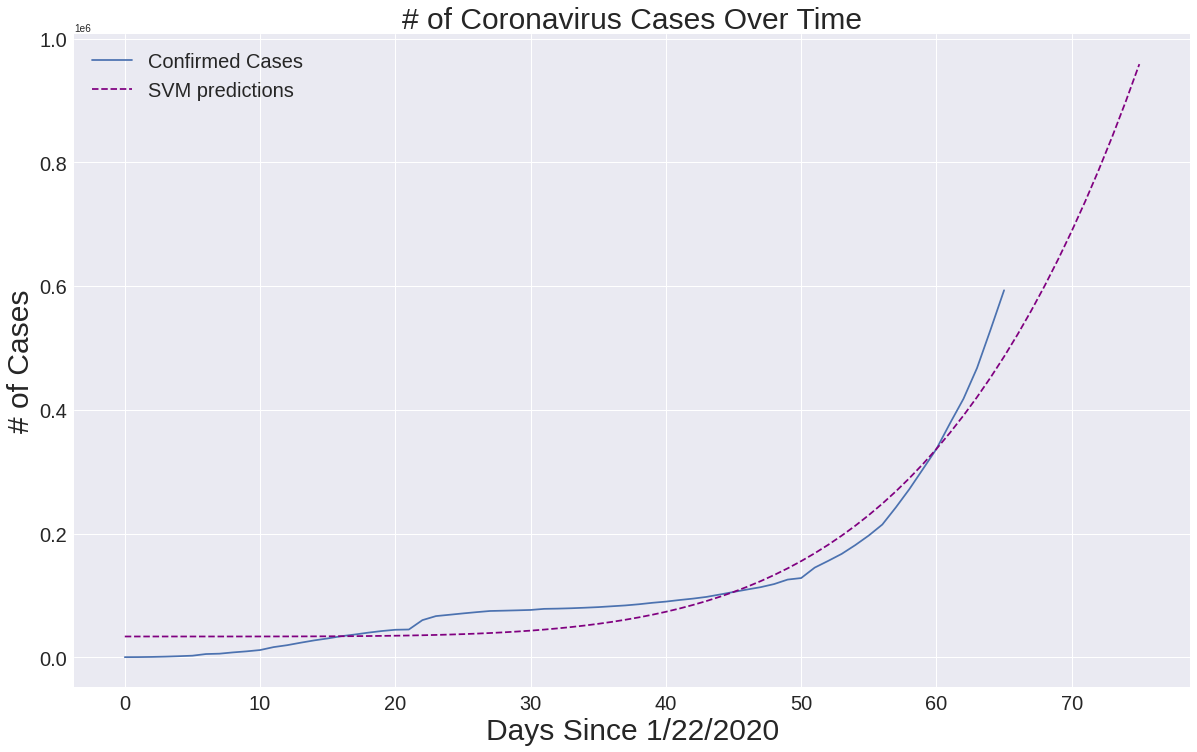

In [22]:
plt.figure(figsize=(20, 12))
plt.plot(adjusted_dates, world_cases)
plt.plot(future, svm_pred, linestyle='dashed', color='purple')
plt.title('# of Coronavirus Cases Over Time', size=30)
plt.xlabel('Days Since 1/22/2020', size=30)
plt.ylabel('# of Cases', size=30)
plt.legend(['Confirmed Cases', 'SVM predictions'], prop={'size': 20})
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

In [23]:

# Future predictions using SVM 
print('SVM future predictions:')
set(zip(future_forcast_dates[-10:], np.round(svm_pred[-10:])))

SVM future predictions:


{('03/28/2020', 521944.0),
 ('03/29/2020', 560051.0),
 ('03/30/2020', 600502.0),
 ('03/31/2020', 643404.0),
 ('04/01/2020', 688867.0),
 ('04/02/2020', 737003.0),
 ('04/03/2020', 787929.0),
 ('04/04/2020', 841764.0),
 ('04/05/2020', 898631.0),
 ('04/06/2020', 958657.0)}

###Polynomial

In [0]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=5)
poly_X_train_confirmed = poly.fit_transform(confirmed_X_train)
poly_X_test_confirmed = poly.fit_transform(confirmed_X_test)
poly_future = poly.fit_transform(future)

In [0]:
from sklearn.linear_model import LinearRegression

In [0]:
linear_model = LinearRegression(normalize=True, fit_intercept=False)
linear_model.fit(poly_X_train_confirmed, confirmed_y_train)
test_linear_pred = linear_model.predict(poly_X_test_confirmed)
linear_pred = linear_model.predict(poly_future)

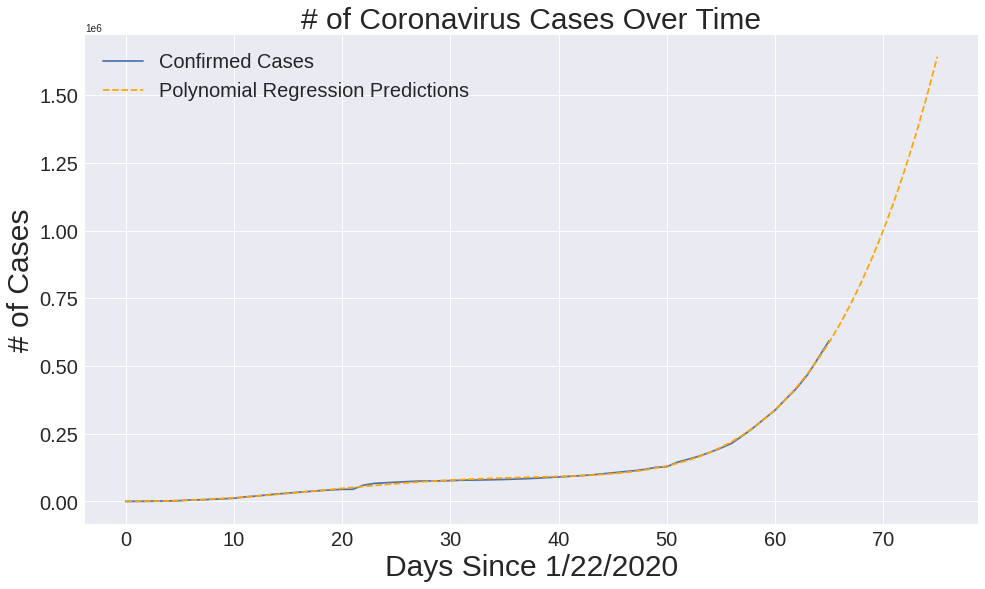

In [27]:
plt.figure(figsize=(16, 9))
plt.plot(adjusted_dates, world_cases)
plt.plot(future, linear_pred, linestyle='dashed', color='orange')
plt.title('# of Coronavirus Cases Over Time', size=30)
plt.xlabel('Days Since 1/22/2020', size=30)
plt.ylabel('# of Cases', size=30)
plt.legend(['Confirmed Cases', 'Polynomial Regression Predictions'], prop={'size': 20})
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

In [28]:
# Future predictions using Polynomial Regression 
linear_pred = linear_pred.reshape(1,-1)[0]
print('Polynomial regression future predictions:')
set(zip(future_forcast_dates[-10:], np.round(linear_pred[-10:])))

Polynomial regression future predictions:


{('03/28/2020', 654879.0),
 ('03/29/2020', 729389.0),
 ('03/30/2020', 811374.0),
 ('03/31/2020', 901360.0),
 ('04/01/2020', 999894.0),
 ('04/02/2020', 1107546.0),
 ('04/03/2020', 1224910.0),
 ('04/04/2020', 1352603.0),
 ('04/05/2020', 1491266.0),
 ('04/06/2020', 1641567.0)}

### Bayesian Ridge Regression

In [29]:
from sklearn.linear_model import BayesianRidge
tol = [1e-4, 1e-3, 1e-2]
alpha_1 = [1e-7, 1e-6, 1e-5, 1e-4]
alpha_2 = [1e-7, 1e-6, 1e-5, 1e-4]
lambda_1 = [1e-7, 1e-6, 1e-5, 1e-4]
lambda_2 = [1e-7, 1e-6, 1e-5, 1e-4]

bayesian_grid = {'tol': tol, 'alpha_1': alpha_1, 'alpha_2' : alpha_2, 'lambda_1': lambda_1, 'lambda_2' : lambda_2}

bayesian = BayesianRidge(fit_intercept=False, normalize=True)
bayesian_search = RandomizedSearchCV(bayesian, bayesian_grid, scoring='neg_mean_squared_error', cv=3, return_train_score=True, n_jobs=-1, n_iter=40, verbose=1)
bayesian_search.fit(poly_X_train_confirmed, confirmed_y_train)

Fitting 3 folds for each of 40 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:    1.5s finished


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=BayesianRidge(alpha_1=1e-06, alpha_2=1e-06,
                                           alpha_init=None, compute_score=False,
                                           copy_X=True, fit_intercept=False,
                                           lambda_1=1e-06, lambda_2=1e-06,
                                           lambda_init=None, n_iter=300,
                                           normalize=True, tol=0.001,
                                           verbose=False),
                   iid='deprecated', n_iter=40, n_jobs=-1,
                   param_distributions={'alpha_1': [1e-07, 1e-06, 1e-05,
                                                    0.0001],
                                        'alpha_2': [1e-07, 1e-06, 1e-05,
                                                    0.0001],
                                        'lambda_1': [1e-07, 1e-06, 1e-05,
                                                 

In [0]:
bayesian_confirmed = bayesian_search.best_estimator_
test_bayesian_pred = bayesian_confirmed.predict(poly_X_test_confirmed)
bayesian_pred = bayesian_confirmed.predict(poly_future)

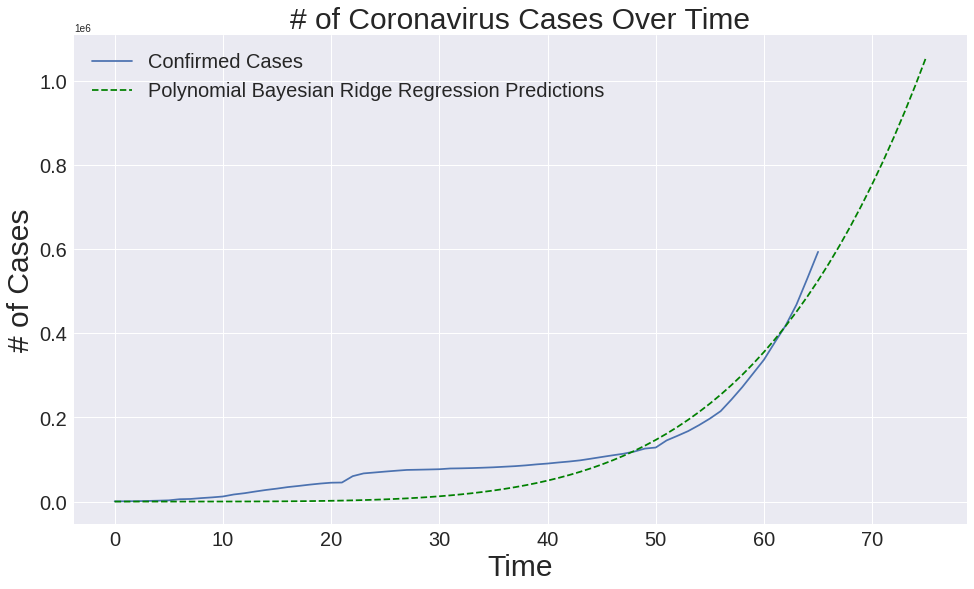

In [31]:
plt.figure(figsize=(16, 9))
plt.plot(adjusted_dates, world_cases)
plt.plot(future, bayesian_pred, linestyle='dashed', color='green')
plt.title('# of Coronavirus Cases Over Time', size=30)
plt.xlabel('Time', size=30)
plt.ylabel('# of Cases', size=30)
plt.legend(['Confirmed Cases', 'Polynomial Bayesian Ridge Regression Predictions'], prop={'size': 20})
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

In [37]:
# Future predictions using Linear Regression 
print('Ridge regression future predictions:')
set(zip(future_forcast_dates[-10:], np.round(bayesian_pred[-10:])))

Ridge regression future predictions:


{('03/28/2020', 565604.0),
 ('03/29/2020', 608698.0),
 ('03/30/2020', 654377.0),
 ('03/31/2020', 702757.0),
 ('04/01/2020', 753955.0),
 ('04/02/2020', 808093.0),
 ('04/03/2020', 865296.0),
 ('04/04/2020', 925692.0),
 ('04/05/2020', 989412.0),
 ('04/06/2020', 1056592.0)}